In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
# import sklearn.preprocessing as sk
from collections import Counter

# from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [81]:
exp1_data = pd.read_csv("allTogetherSep.csv")
exp2_data = pd.read_csv("allTogetherOct.csv")

In [82]:
exp1_data_T = pd.DataFrame.transpose(exp1_data).reset_index()
exp1_data_T

,index,0,1,2,3,4,5,6,7,8,...,286,287,288,289,290,291,292,293,294,295
0,Basic information,What is your gender?,Please indicate your age,Please indicate your ethnic background (optional),What is your highest level of education?,How would you rate your technology expertise?,How do you feel about including technology in ...,How would you rate your experience with smart ...,Propensity Questions,I usually trust machines until there is a reas...,...,exp2-st2-sec2,#ignore an alert,exp1-st1-sec1,exp1-st1-sec2,exp1-st2-sec1,exp1-st2-sec2,exp2-st1-sec1,exp2-st1-sec2,exp2-st2-sec1,exp2-st2-sec2
1,1,2,1,7,4,2,0,3,NaN,3,...,17,NaN,9,11,13,1,0,0,0,0
2,2,1,1,4,4,2,1,2,NaN,4,...,17,NaN,0,0,1,0,0,0,0,0
3,3,2,1,7,4,2,1,2,NaN,4,...,16,NaN,0,0,0,0,0,0,0,0
4,4,2,1,4,4,3,1,2,NaN,4,...,15,NaN,1,0,0,0,0,0,0,1
5,5,2,1,7,4,2,1,2,NaN,4,...,2,NaN,7,9,8,14,5,10,15,15
6,6,2,1,7,3,2,0,2,NaN,5,...,5,NaN,0,0,3,9,6,7,7,8
7,7,1,1,4,4,2,1,1,NaN,4,...,6,NaN,4,2,5,2,0,1,0,9
8,9,1,1,4,2,2,1,2,NaN,4,...,17,NaN,5,0,4,1,1,0,0,0
9,10,1,1,1,5,2,0,1,NaN,5,...,9,NaN,8,11,13,16,11,7,9,8


In [83]:
exp2_data_T = pd.DataFrame.transpose(exp2_data).reset_index()
#exp2_data_T

In [84]:
exp1_demo = exp1_data_T.values[1:19,1:8]
exp2_demo = exp2_data_T.values[1:19,1:8]
#exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_demo = np.vstack((exp1_demo,exp2_demo)).astype(int)
exp_demo

array([[2, 1, 7, 4, 2, 0, 3],
       [1, 1, 4, 4, 2, 1, 2],
       [2, 1, 7, 4, 2, 1, 2],
       [2, 1, 4, 4, 3, 1, 2],
       [2, 1, 7, 4, 2, 1, 2],
       [2, 1, 7, 3, 2, 0, 2],
       [1, 1, 4, 4, 2, 1, 1],
       [1, 1, 4, 2, 2, 1, 2],
       [1, 1, 1, 5, 2, 0, 1],
       [2, 1, 7, 3, 2, 1, 2],
       [1, 1, 4, 2, 3, 1, 1],
       [2, 1, 3, 2, 3, 1, 3],
       [1, 1, 4, 2, 3, 1, 2],
       [1, 1, 8, 4, 2, 1, 2],
       [1, 1, 8, 3, 2, 1, 1],
       [2, 1, 4, 4, 2, 0, 2],
       [1, 1, 7, 4, 3, 1, 3],
       [2, 1, 7, 2, 2, 1, 2],
       [2, 1, 4, 4, 2, 0, 1],
       [1, 1, 7, 2, 2, 1, 2],
       [2, 1, 7, 4, 2, 1, 1],
       [2, 1, 7, 7, 2, 1, 1],
       [2, 1, 4, 3, 2, 1, 1],
       [1, 2, 6, 4, 3, 1, 1],
       [2, 1, 8, 4, 2, 1, 2],
       [2, 1, 8, 4, 2, 0, 1],
       [2, 1, 8, 7, 2, 1, 2],
       [2, 1, 8, 7, 2, 1, 1],
       [2, 1, 4, 2, 3, 0, 1],
       [2, 1, 7, 4, 2, 1, 1],
       [1, 1, 3, 4, 2, 1, 2],
       [2, 1, 3, 2, 3, 1, 2],
       [2, 1, 7, 4, 2, 1, 2],
       [1,

[1 2]


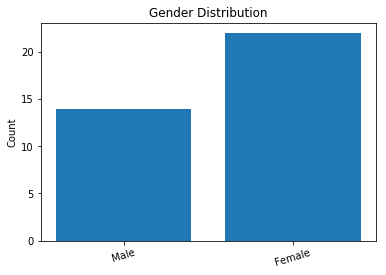

(None, Counter({1: 14, 2: 22}))

In [85]:
gender = Counter(exp_demo[:,0])
print(np.array(sorted(gender.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(gender.keys()))
plt.bar(x, np.array(sorted(gender.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Male','Female'),
           rotation=17)
plt.title("Gender Distribution")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,0]))

[1 2 3]


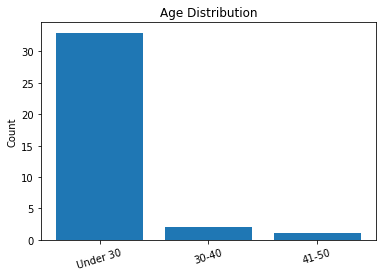

(None, Counter({1: 33, 2: 2, 3: 1}))

In [ ]:
age = Counter(exp_demo[:,1])
print(np.array(sorted(age.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(age.keys()))
plt.bar(x, np.array(sorted(age.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Under 30','30-40','41-50'),
           rotation=17)
plt.title("Age Distribution")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,1]))

In [ ]:
ethic = Counter(exp_demo[:,2])
print(np.array(sorted(ethic.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(ethic.keys()))
plt.bar(x, np.array(sorted(ethic.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('African','Caucasia','East Asian','Hispanic or Latino','South Asian','Other'),
           rotation=17)
plt.title("Ethic Background")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,2]))

In [ ]:
edu = Counter(exp_demo[:,3])
print(np.array(sorted(edu.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(edu.keys()))
plt.bar(x, np.array(sorted(edu.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Secondary','Short-cycle','Bachelor','Master/Honours','Other'),
           rotation=17)
plt.title("Education Background")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,3]))

In [ ]:
# technology expertise
te = Counter(exp_demo[:,4])
print(np.array(sorted(te.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(te.keys()))
plt.bar(x, np.array(sorted(te.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Medium','High'),
           rotation=17)
plt.title("Technology Expertise")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,4]))

In [ ]:
# Feel about technology in your life...

tl = Counter(exp_demo[:,5])
print(np.array(sorted(tl.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(tl.keys()))
plt.bar(x, np.array(sorted(tl.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Neutral','Like'),
           rotation=17)
plt.title("Feel about Technology")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,5]))

# Introductions:
There are 4 stages in each experiment: A,B,C,D; Each stage has two sections with identical system settings

System settings in the experiment one: 

|Events| A-1 | A-2 | B-1 | B-2 | C-1 | C-2 | D-1 | D-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 5| 5| 6| 6| 2| 2| 3| 3|
|# Misses      | 3| 2| 0| 0| 2| 2| 0| 0|

The experiment two has the same system settings to experiment 1, but in a different order, swapped AB and CD

|Events| C-1 | C-2 | D-1 | D-2 | A-1 | A-2 | B-1 | B-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 2| 2| 3| 3| 5| 5| 6| 6|
|# Misses      | 2| 2| 0| 0| 3| 2| 0| 0|

Each experiment has 18 validate results

# Trust Scores

In [ ]:
exp1_trust = exp1_data_T.values[1:19,79:87].astype(int)
exp2_trust = exp2_data_T.values[1:19,79:87].astype(int)
#exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_trust = np.vstack((exp1_trust,np.hstack((exp2_trust[:,4:],exp2_trust[:,:4])))).astype(int)
exp_trust.shape

In [ ]:
# exp1 mean & std
x = np.arange(1,9)
y = np.array(exp1_trust.mean(axis=0))
e = np.array(exp1_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')

plt.title("Trust Score: Experiment One")
plt.show()

# exp1_trust_ms = np.vstack((exp1_trust.mean(axis=0),exp1_trust.std(axis=0)))

In [ ]:
# exp2 mean & std
x = np.arange(1,9)
y = np.array(exp2_trust.mean(axis=0))
e = np.array(exp2_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.title("Trust Score: Experiment Two")
plt.show()

# exp2_trust_ms = np.vstack((exp2_trust.mean(axis=0),exp2_trust.std(axis=0)))

In [ ]:
# overall mean & std
x = np.arange(1,9)
y = np.array(exp_trust.mean(axis=0))
e = np.array(exp_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Trust score: Both Experiments (in order of ABCD)")
plt.show()

# np.vstack((exp_trust.mean(axis=0),exp_trust.std(axis=0)))

## t-test between trust scores with high/low false alert rate

In [ ]:
# within subject exp1: high/low false rate

exp1_trust_hifalse = exp1_trust[:, np.r_[0:4]].T.ravel()
exp1_trust_lofalse = exp1_trust[:, np.r_[4:8]].T.ravel()

print(exp1_trust_hifalse.mean(),exp1_trust_hifalse.std())
print(exp1_trust_lofalse.mean(),exp1_trust_lofalse.std())
sp.ttest_rel(exp1_trust_hifalse,exp1_trust_lofalse)
#sp.ttest_ind

In [ ]:
# within subject exp2: high/low false rate

exp2_trust_hifalse = exp2_trust[:, np.r_[4:8]].T.ravel()
exp2_trust_lofalse = exp2_trust[:, np.r_[0:4]].T.ravel()

print(exp2_trust_hifalse.mean(),exp2_trust_hifalse.std())
print(exp2_trust_lofalse.mean(),exp2_trust_lofalse.std())
sp.ttest_rel(exp2_trust_hifalse,exp2_trust_lofalse)
#sp.ttest_ind

In [ ]:
# within subject all exps: high/low false rate

exp_trust_hifalse = exp_trust[:, np.r_[0:4]].T.ravel()
exp_trust_lofalse = exp_trust[:, np.r_[4:8]].T.ravel()

print(exp_trust_hifalse.mean(),exp_trust_hifalse.std())
print(exp_trust_lofalse.mean(),exp_trust_lofalse.std())
sp.ttest_rel(exp_trust_hifalse,exp_trust_lofalse)

## t-test between trust scores with/without event missing rate

In [ ]:
# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1],exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3],exp1_trust[:,6],exp1_trust[:,7]))

print(exp1_trust_misses.mean(),exp1_trust_misses.std())
print(exp1_trust_nomisses.mean(),exp1_trust_nomisses.std())
sp.ttest_ind(exp1_trust_misses,exp1_trust_nomisses)
#sp.ttest_ind

In [ ]:
# within subject exp2: with/without misses

exp2_trust_misses = np.hstack((exp2_trust[:,0],exp2_trust[:,1],exp2_trust[:,4],exp2_trust[:,5]))
exp2_trust_nomisses = np.hstack((exp2_trust[:,2],exp2_trust[:,3],exp2_trust[:,6],exp2_trust[:,7]))

print(exp2_trust_misses.mean(),exp2_trust_misses.std())
print(exp2_trust_nomisses.mean(),exp2_trust_nomisses.std())
sp.ttest_ind(exp2_trust_misses,exp2_trust_nomisses)
#sp.ttest_ind

In [ ]:
# within subject all exps: with/without misses

exp_trust_misses = np.hstack((exp_trust[:,0],exp_trust[:,1],exp_trust[:,4],exp_trust[:,5]))
exp_trust_nomisses = np.hstack((exp_trust[:,2],exp_trust[:,3],exp_trust[:,6],exp_trust[:,7]))

print(exp_trust_misses.mean(),exp_trust_misses.std())
print(exp_trust_nomisses.mean(),exp_trust_nomisses.std())
sp.ttest_ind(exp_trust_misses,exp_trust_nomisses)
#sp.ttest_ind

## t-test trust scores between two sections in each stage

In [ ]:
# check if there is a training period

exp_trust_sec1 = exp_trust[:, np.r_[0,2,4,6]].T.ravel()
exp_trust_sec2 = exp_trust[:, np.r_[1,3,5,7]].T.ravel()

print(exp_trust_sec1.mean(),exp_trust_sec1.std())
print(exp_trust_sec2.mean(),exp_trust_sec2.std())
sp.ttest_rel(exp_trust_sec1,exp_trust_sec2)

# Number of Events Attended

In [ ]:
exp1_attend = exp1_data_T.values[1:19,124:132].astype(int)
exp2_attend = exp2_data_T.values[1:19,124:132].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attend = np.vstack((exp1_attend,np.hstack((exp2_attend[:,4:],exp2_attend[:,:4])))).astype(int)
exp_attend.shape

In [ ]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_attend.mean(axis=0))
e = np.array(exp1_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Experiment One")
plt.show()

# exp1 mean & std
np.vstack((exp1_attend.mean(axis=0),exp1_attend.std(axis=0)))

In [ ]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_attend.mean(axis=0))
e = np.array(exp2_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Experiment Two")   
plt.show()

# exp2 mean & std
np.vstack((exp2_attend.mean(axis=0),exp2_attend.std(axis=0)))

In [ ]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_attend.mean(axis=0))
e = np.array(exp_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Event Attended: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_attend.mean(axis=0),exp_attend.std(axis=0)))

## t-test between # attended events with high/low false alert rate

In [ ]:
# within population: high/low false rate

exp_attend_hifalse = exp_attend[:, np.r_[0:4]].T.ravel()
exp_attend_lofalse = exp_attend[:, np.r_[4:8]].T.ravel()

print(exp_attend_hifalse.mean(),exp_attend_hifalse.std())
print(exp_attend_lofalse.mean(),exp_attend_lofalse.std())
sp.ttest_rel(exp_attend_hifalse,exp_attend_lofalse)
#sp.ttest_ind

## t-test between # attended events with/without missing rate

In [ ]:
# within population with/without misses

exp_attend_misses = np.hstack((exp_attend[:,0],exp_attend[:,1],exp_attend[:,4],exp_attend[:,5]))
exp_attend_nomisses = np.hstack((exp_attend[:,2],exp_attend[:,3],exp_attend[:,6],exp_attend[:,7]))

print(exp_attend_misses.mean(),exp_attend_misses.std())
print(exp_attend_nomisses.mean(),exp_attend_nomisses.std())
sp.ttest_rel(exp_attend_misses,exp_attend_nomisses)
#sp.ttest_ind

## t-test: # attended events between two sections in each stage

In [ ]:
# check if there is a training period

exp_attend_sec1 = exp_attend[:, np.r_[0,2,4,6]].T.ravel()
exp_attend_sec2 = exp_attend[:, np.r_[1,3,5,7]].T.ravel()

print(exp_attend_sec1.mean(),exp_attend_sec1.std())
print(exp_attend_sec2.mean(),exp_attend_sec2.std())
sp.ttest_rel(exp_attend_sec1,exp_attend_sec2)

## Correlation between # Attended Events vs Trust Scores

In [ ]:
# pearson correlation
sp.pearsonr(exp_trust.T.ravel(), exp_attend.T.ravel())

In [ ]:
# spearman correlation
sp.spearmanr(exp_trust.T.ravel(), exp_attend.T.ravel())

# Number of Alerts Attended

In [ ]:
exp1_attend_alert = exp1_data_T.values[1:19,280:288].astype(int)
exp2_attend_alert = exp2_data_T.values[1:19,280:288].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attend_alert = np.vstack((exp1_attend_alert,np.hstack((exp2_attend_alert[:,4:],exp2_attend_alert[:,:4])))).astype(int)
exp_attend_alert.shape

In [ ]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_attend_alert.mean(axis=0))
e = np.array(exp1_attend_alert.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment One")
plt.show()

# exp1 mean & std
np.vstack((exp1_attend_alert.mean(axis=0),exp1_attend_alert.std(axis=0)))

In [ ]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_attend_alert.mean(axis=0))
e = np.array(exp2_attend_alert.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Experiment Two")   
plt.show()

# exp2 mean & std
np.vstack((exp2_attend_alert.mean(axis=0),exp2_attend_alert.std(axis=0)))

In [ ]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_attend_alert.mean(axis=0))
e = np.array(exp_attend_alert.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Alerts Attended: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_attend_alert.mean(axis=0),exp_attend_alert.std(axis=0)))

## t-test: # attended alerts between two sections in each stage

In [ ]:
# check if there is a training period

exp_attend_alert_sec1 = exp_attend_alert[:, np.r_[0,2,4,6]].T.ravel()
exp_attend_alert_sec2 = exp_attend_alert[:, np.r_[1,3,5,7]].T.ravel()

print(exp_attend_alert_sec1.mean(),exp_attend_alert_sec1.std())
print(exp_attend_alert_sec2.mean(),exp_attend_alert_sec2.std())
sp.ttest_rel(exp_attend_alert_sec1,exp_attend_alert_sec2)

## Correlation between # Attended Alerts(proportion) vs Trust Scores

In [ ]:
# pearson correlation
sp.pearsonr(exp_trust.T.ravel(), (exp_attend_alert/np.array([17,17,20,20,14,14,17,17])).T.ravel())

In [ ]:
# spearman correlation
sp.spearmanr(exp_trust.T.ravel(), (exp_attend_alert/np.array([17,17,20,20,14,14,17,17])).T.ravel())

## Correlation between # Attended False Alerts vs Trust Scores

In [ ]:
exp1_attendf = exp1_data_T.values[1:19,214:222].astype(int)
exp2_attendf = exp2_data_T.values[1:19,214:222].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attendf = np.vstack((exp1_attendf,np.hstack((exp2_attendf[:,4:],exp2_attendf[:,:4])))).astype(int)

sp.pearsonr(exp_trust.T.ravel(), (exp_attendf/np.array([17,17,20,20,14,14,17,17])).T.ravel())

In [ ]:
exp1_attendf = exp1_data_T.values[1:19,214:222].astype(int)
exp2_attendf = exp2_data_T.values[1:19,214:222].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attendf = np.vstack((exp1_attendf,np.hstack((exp2_attendf[:,4:],exp2_attendf[:,:4])))).astype(int)

sp.spearmanr(exp_trust.T.ravel(), (exp_attendf/np.array([17,17,20,20,14,14,17,17])).T.ravel())

# Number of Checks Clicked

In [ ]:
exp1_check = exp1_data_T.values[1:19,253:261].astype(int)
exp2_check = exp2_data_T.values[1:19,253:261].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_check = np.vstack((exp1_check,np.hstack((exp2_check[:,4:],exp2_check[:,:4])))).astype(int)
exp_check.shape

In [ ]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_check.mean(axis=0))
e = np.array(exp1_check.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Experiment One")
plt.show()

# exp1 mean & std
np.vstack((exp1_check.mean(axis=0),exp1_check.std(axis=0)))

In [ ]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_check.mean(axis=0))
e = np.array(exp2_check.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Experiment Two")   
plt.show()

# exp2 mean & std
np.vstack((exp2_check.mean(axis=0),exp2_check.std(axis=0)))

In [ ]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_check.mean(axis=0))
e = np.array(exp_check.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,10])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Checks: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_check.mean(axis=0),exp_check.std(axis=0)))

## t-test: # checks between two sections in each stage

In [ ]:
# check if there is a training period

exp_check_sec1 = exp_check[:, np.r_[0,2,4,6]].T.ravel()
exp_check_sec2 = exp_check[:, np.r_[1,3,5,7]].T.ravel()

print(exp_check_sec1.mean(),exp_check_sec1.std())
print(exp_check_sec2.mean(),exp_check_sec2.std())
sp.ttest_rel(exp_check_sec1,exp_check_sec2)

## t-test: # checks with high/low false alert rate

In [ ]:
# within population: high/low false rate

exp_check_hifalse = exp_check[:, np.r_[0:4]].T.ravel()
exp_check_lofalse = exp_check[:, np.r_[4:8]].T.ravel()

print(exp_check_hifalse.mean(),exp_check_hifalse.std())
print(exp_check_lofalse.mean(),exp_check_lofalse.std())
sp.ttest_rel(exp_check_hifalse,exp_check_lofalse)
#sp.ttest_ind

## t-test: # checks with/without missing events

In [ ]:
# within population with/without misses

exp_check_misses = np.hstack((exp_check[:,0],exp_check[:,1],exp_check[:,4],exp_check[:,5]))
exp_check_nomisses = np.hstack((exp_check[:,2],exp_check[:,3],exp_check[:,6],exp_check[:,7]))

print(exp_check_misses.mean(),exp_check_misses.std())
print(exp_check_nomisses.mean(),exp_check_nomisses.std())
sp.ttest_rel(exp_check_misses,exp_check_nomisses)
#sp.ttest_ind

## Correlation between # Checks vs Trust Scores

In [ ]:
# pearson correlation
sp.pearsonr(exp_trust.T.ravel(), exp_check.T.ravel())

In [ ]:
# spearman correlation
sp.spearmanr(exp_trust.T.ravel(), exp_check.T.ravel())

# Num of Admin Tasks

In [ ]:
exp1_admin = exp1_data_T.values[1:19,94:102].astype(int)
exp2_admin = exp2_data_T.values[1:19,94:102].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_admin = np.vstack((exp1_admin,np.hstack((exp2_admin[:,4:],exp2_admin[:,:4])))).astype(int)
exp_admin.shape

In [ ]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_admin.mean(axis=0))
e = np.array(exp1_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.title("# Admin Tasks: Experiment 1 (ABCD)")    
plt.show()

# exp1 mean & std
np.vstack((exp1_admin.mean(axis=0),exp1_admin.std(axis=0)))

In [ ]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_admin.mean(axis=0))
e = np.array(exp2_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')

plt.title("# Admin Tasks: Experiment 2 (CDAB)")    
plt.show()

# exp2 mean & std
np.vstack((exp2_admin.mean(axis=0),exp2_admin.std(axis=0)))

In [ ]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_admin.mean(axis=0))
e = np.array(exp_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("# Admin tasks: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_admin.mean(axis=0),exp_admin.std(axis=0)))

## Correlation between # Attended Admins vs # Attended Alerts

In [ ]:
# pearson correlation
sp.pearsonr(exp_admin.T.ravel(), exp_attend_alert.ravel())

In [ ]:
# spearman correlation
sp.spearmanr(exp_admin.T.ravel(), exp_attend_alert.ravel())

# Earnings & Losses

In [ ]:
exp1_admin_w = exp1_data_T.values[1:19,114:122].astype(int)
exp2_admin_w = exp2_data_T.values[1:19,114:122].astype(int)
exp_admin_w = np.vstack((exp1_admin_w,np.hstack((exp2_admin_w[:,4:],exp2_admin_w[:,:4])))).astype(int)

# correct cards:$4 
# wrong cards: $4
# use (total admin - 2x wrong admin)x$4 to get net profit
Earnings_admin = 4*(exp_admin - 2*exp_admin_w)

In [ ]:
# overall mean & std
x = np.arange(8)
y = np.array(Earnings_admin.mean(axis=0))
e = np.array(Earnings_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Admin earnings: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((Earnings_admin.mean(axis=0),Earnings_admin.std(axis=0)))

In [ ]:
# final balance
exp1_fnl_balance = exp1_data_T.values[1:19,244:252].astype(int)
exp2_fnl_balance = exp2_data_T.values[1:19,244:252].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_fnl_balance = np.vstack((exp1_fnl_balance,np.hstack((exp2_fnl_balance[:,4:],exp2_fnl_balance[:,:4])))).astype(int)

# reverse engineering to find total losses from monitoring system
Total_loss = exp_fnl_balance - Earnings_admin - 150

In [ ]:
# overall mean & std
x = np.arange(8)
y = np.array(Total_loss.mean(axis=0))
e = np.array(Total_loss.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Total losses: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((Total_loss.mean(axis=0),Total_loss.std(axis=0)))

In [ ]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_fnl_balance.mean(axis=0))
e = np.array(exp_fnl_balance.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
# axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
plt.title("Final balance: Both Experiments (in order of ABCD)")    
plt.show()

# overall mean & std
np.vstack((exp_fnl_balance.mean(axis=0),exp_fnl_balance.std(axis=0)))

# Propensity Questions

In [ ]:
exp1_prop = exp1_data_T.values[1:19,9:15].astype(int)
exp2_prop = exp2_data_T.values[1:19,9:15].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_prop = np.vstack((exp1_prop,np.hstack((exp2_prop[:,4:],exp2_prop[:,:4])))).astype(int)

In [ ]:
# overall mean & std
x = np.arange(6)+1
y = np.array(exp_prop.mean(axis=0))
e = np.array(exp_prop.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Propensity Questions: Both Experiments (ABCD) \n 1: strongly disagree 5 strongly agree")    
plt.show()

# overall mean & std
np.vstack((exp_prop.mean(axis=0),exp_prop.std(axis=0)))

# Post-stage Questions

In [ ]:
# exp1_pstq = np.hstack((exp1_data_T.values[1:19,16:19],exp1_data_T.values[1:19,21:28],
#                        exp1_data_T.values[1:19,29:32],exp1_data_T.values[1:19,34:41],
#                        exp1_data_T.values[1:19,42:45],exp1_data_T.values[1:19,47:54],
#                        exp1_data_T.values[1:19,55:58],exp1_data_T.values[1:19,60:67])).astype(int)
# exp2_pstq = np.hstack((exp2_data_T.values[1:19,16:19],exp2_data_T.values[1:19,21:28],
#                        exp2_data_T.values[1:19,29:32],exp2_data_T.values[1:19,34:41],
#                        exp2_data_T.values[1:19,42:45],exp2_data_T.values[1:19,47:54],
#                        exp2_data_T.values[1:19,55:58],exp2_data_T.values[1:19,60:67])).astype(int)

exp1_pstq = exp1_data_T.values[1:19, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)
exp2_pstq = exp2_data_T.values[1:19, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)

# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_pstq = np.vstack((exp1_pstq,np.hstack((exp2_pstq[:,20:],exp2_pstq[:,:20])))).astype(int)

In [ ]:
# overall mean & std
np.vstack((exp_pstq.mean(axis=0),exp_pstq.std(axis=0)))

In [ ]:
# exp1 mean & std
np.vstack((exp1_pstq.mean(axis=0),exp1_pstq.std(axis=0)))

In [ ]:
# exp2 mean & std
np.vstack((exp2_pstq.mean(axis=0),exp2_pstq.std(axis=0)))

# Post-game Questions

In [ ]:
exp1_pgq = exp1_data_T.values[1:19,69:76]
exp2_pgq = exp2_data_T.values[1:19,69:76]
exp_pgq = np.vstack((exp1_pgq,exp2_pgq)).astype(int)
exp_pgq

In [ ]:
pg1 = Counter(exp_pgq[:,0])
print(np.array(sorted(pg1.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(pg1.keys()))
plt.bar(x, np.array(sorted(pg1.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Difficult','Fine','Easy','Very Easy'),
           rotation=17)
plt.title("How difficult was your admin job in the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,0]))

In [ ]:
pg2 = Counter(exp_pgq[:,1])
print(np.array(sorted(pg2.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(pg2.keys()))
plt.bar(x, np.array(sorted(pg2.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Quite bored','A little bored','Neutral','A little engaged','Quite engaged'),
           rotation=17)
plt.title("How engaged were you with the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,1]))

In [ ]:
pg3 = Counter(exp_pgq[:,2])
print(np.array(sorted(pg3.items(), key= lambda t: (t[0]), reverse=False))[:,0])

In [ ]:
x = np.arange(len(pg3.keys()))
plt.bar(x, np.array(sorted(pg3.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Quite Stressful','A little stressful','Not at all'),
           rotation=17)
plt.title("How stressful was the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,2]))

In [ ]:
pg4 = Counter(exp_pgq[:,3])
print(np.array(sorted(pg4.items(), key= lambda t: (t[0]), reverse=False))[:,0])

In [ ]:
x = np.arange(len(pg4.keys()))
plt.bar(x, np.array(sorted(pg4.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Not at all','A little','Moderately','Very'),
           rotation=17)
plt.title("How important to do well in the card game?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,3]))

In [ ]:
pg5 = Counter(exp_pgq[:,4])
print(np.array(sorted(pg5.items(), key= lambda t: (t[0]), reverse=False))[:,0])

In [ ]:
x = np.arange(len(pg5.keys()))
plt.bar(x, np.array(sorted(pg5.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Not at all','A little','Moderately','Very'),
           rotation=17)
plt.title("How important was it for you that the elderly residents are ok?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,4]))

In [ ]:
pg6 = Counter(exp_pgq[:,5])
print(np.array(sorted(pg6.items(), key= lambda t: (t[0]), reverse=False))[:,0])

In [ ]:
x = np.arange(len(pg6.keys()))
plt.bar(x, np.array(sorted(pg6.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('The game experience','Interim report','Both'),
           rotation=0)
plt.title("How did you determine the trust to monitoring system?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,5]))

In [ ]:
pg7 = Counter(exp_pgq[:,6])
print(np.array(sorted(pg7.items(), key= lambda t: (t[0]), reverse=False))[:,0])

In [ ]:
x = np.arange(len(pg7.keys()))
plt.bar(x, np.array(sorted(pg7.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('No','Yes'))
plt.title("Was the tutorial video sufficiently helpful?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,6]))